# Determining patient fate

In [133]:
import scanpy as sc
import pandas as pd
import scvelo as scv
import cellrank as cr
import ehrapy as ep
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_annotations = pd.read_csv('data/public-annotations.csv')

filenames = pd.read_csv("filenames.csv", index_col=None)

df_annotations = df_annotations[df_annotations.filename.isin(list(filenames['filename']))].reset_index(drop=True)
df_annotations['geographic_mean'] = df_annotations['S-Global']

In [184]:
df_annotations['geographic_mean'].replace([0, 1, 2,], "Normal", inplace=True)
df_annotations['geographic_mean'].replace([3, 4, 5], "Mild", inplace=True)
df_annotations['geographic_mean'].replace([6, 7, 8, 9, 10, 11], "Medium", inplace=True)
df_annotations['geographic_mean'].replace([12, 13, 14, 15, 16, 17, 18], "Severe", inplace=True)

In [185]:
adata = sc.read_csv(f"embeddings.csv")
adata.obs['geographic_mean'] = df_annotations['geographic_mean'].values

In [186]:
palette={
        "Normal": "yellowgreen",
        "Mild": "darkorange",
        "Medium": "mediumturquoise",
        "Severe": "red"
    }

/Users/xinyuezhang/ehrapy-reproducibility/.venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



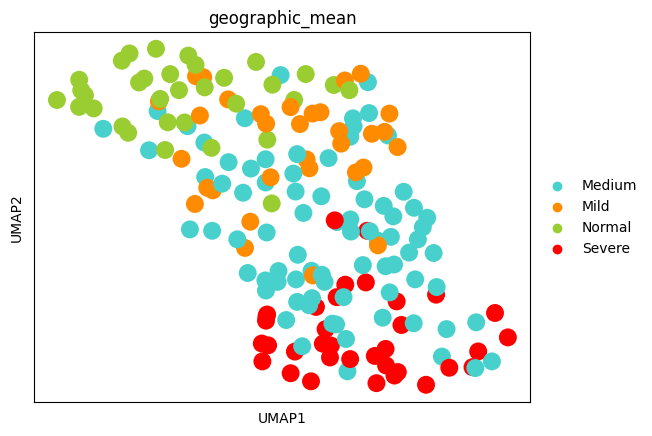

/Users/xinyuezhang/ehrapy-reproducibility/.venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



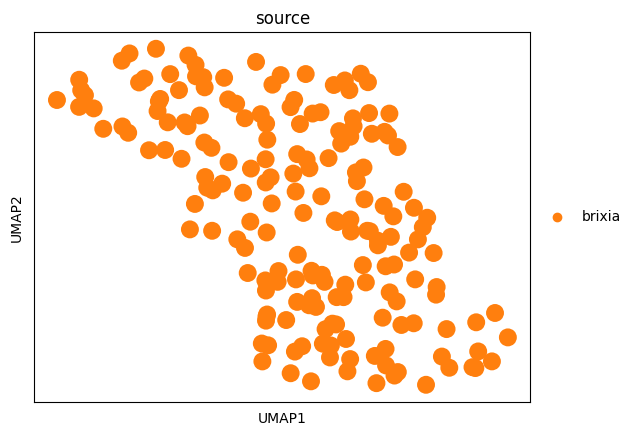

In [190]:
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata, n_components=3)
ep.pl.umap(adata, color=['geographic_mean'], palette=palette)

In [203]:
adata.uns["iroot"] = np.flatnonzero(adata.obs['geographic_mean'] == 'Normal')[2]
ep.tl.dpt(adata)
pk = cr.tl.kernels.PseudotimeKernel(adata)
pk.compute_transition_matrix(threshold_scheme='soft')
pk.compute_projection(basis="umap")

100%|██████████| 180/180 [00:00<00:00, 470.01cell/s]


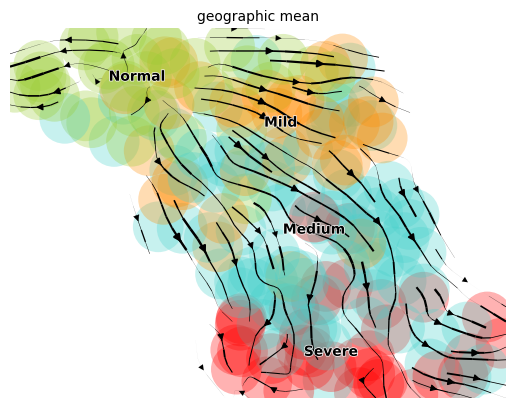

In [204]:
scv.pl.velocity_embedding_stream(adata, vkey="T_fwd", basis="umap", color="geographic_mean", density=1, smooth=True)

100%|██████████| 656/656 [00:00<00:00, 1838.68cell/s]


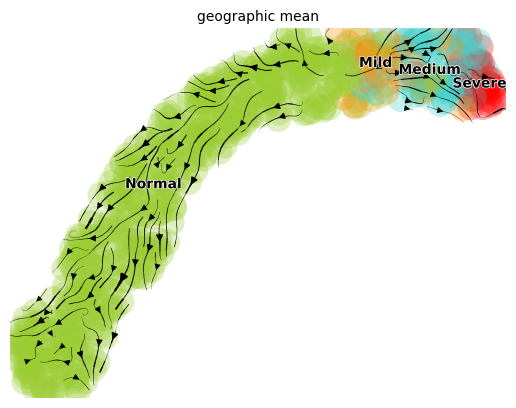

In [158]:
adata.uns["iroot"] = np.flatnonzero(adata.obs['geographic_mean'] == 'Normal')[22]
ep.tl.dpt(adata)
pk = cr.tl.kernels.PseudotimeKernel(adata)
pk.compute_transition_matrix()
pk.compute_projection(basis="umap")
scv.pl.velocity_embedding_stream(adata, vkey="T_fwd", basis="umap", color="geographic_mean")

In [ ]:
for min_dist in [1, 3, 5, 7, 9, 11, 13, 15]:
    for spread in [0.5, 1, 3]:
        for n_neighbors in [3, 5, 10, 15, 20]:
            param_str=' '.join(['min_dist =',str(min_dist),'and spread =',str(spread),'and n_neighbors =',str(n_neighbors)])
            sc.pp.neighbors(adata, n_neighbors=n_neighbors)
            ep.tl.umap(adata, min_dist=min_dist, spread=spread, n_components=3)
            g=ep.pl.umap(adata,title=param_str,
                    show=False, return_fig=True, color=['geographic_mean'], palette=palette)
            display(g)
            plt.close()